# ML Term Paper - Code: Models
by Ann-Christin and Sarah 15/02/2021

In [7]:
# import libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split


from sklearn import ensemble
from sklearn import tree as tree

#pd.set_option("display.max_rows", None, "display.max_columns", None)

In [8]:
import os
path = "E:\Data\krea\PIAAC"
os.chdir(path)
print("done")
data = pd.read_csv("data/piaac_red.csv", sep=',', error_bad_lines=False, index_col=False)
data.shape

done


E:\Anaconda3\envs\base-krea\lib\site-packages\IPython\core\interactiveshell.py:3156: DtypeWarning: Columns (1,2,5,6,13,19,24,26,27,30,32,33,40,49,52,59,60,61,64,65,67,70,77,86,87,88,94) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(230691, 133)

In [9]:
data.describe()

,Unnamed: 0,inpiaac,seqid,age_r,j_q03b,j_q03b_c,racethn_5cat,yrsqual,yrsqual_t,yrsget,...,readytolearn,icthome,ictwork,earnmthallppp,earnmthbonusppp,earnmthselfppp,nfehrsnjr,nfehrsjr,nfehrs,unempflag
count,230691.000000,3660.000000,230691.000000,166949.000000,103091.000000,144543.000000,3472.000000,218593.000000,213568.000000,125736.000000,...,226734.000000,171755.000000,102478.000000,8.850800e+04,7.677600e+04,11732.000000,54687.000000,54687.000000,80121.000000,3477.000000
mean,115345.000000,0.900546,4401.442982,39.687485,2.258296,2.165992,2.247408,12.536184,12.546814,12.567069,...,2.037301,2.028157,2.016022,3.157575e+03,3.259009e+03,2493.775348,55.298554,84.441805,140.938755,0.039689
std,66594.899812,0.299311,4735.160301,14.302125,1.264413,0.940666,0.982485,3.289158,3.300026,3.516878,...,1.024525,1.008360,1.021538,6.821093e+04,7.313718e+04,9771.976917,198.082778,196.587656,301.342789,0.195257
min,0.000000,0.000000,1.000000,16.000000,1.000000,1.000000,1.000000,3.000000,3.000000,0.000000,...,-1.074991,-1.209050,0.008980,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,57672.500000,1.000000,1649.000000,27.000000,1.000000,1.000000,2.000000,11.000000,11.000000,11.000000,...,1.355049,1.338901,1.210520,9.259300e+02,1.016686e+03,200.162500,0.000000,9.000000,16.000000,0.000000
50%,115345.000000,1.000000,3298.000000,39.000000,2.000000,2.000000,2.000000,12.000000,12.000000,13.000000,...,1.992110,2.088670,1.854941,1.790609e+03,1.864409e+03,1014.449100,0.000000,30.000000,40.000000,0.000000
75%,173017.500000,1.000000,5008.000000,52.000000,3.000000,3.000000,2.000000,15.000000,15.000000,15.000000,...,2.588965,2.683840,2.624086,3.177483e+03,3.212351e+03,2827.312600,20.000000,80.000000,112.000000,0.000000
max,230690.000000,1.000000,27285.000000,65.000000,25.000000,4.000000,6.000000,23.000000,23.000000,23.000000,...,4.643640,7.710160,5.463352,1.187756e+07,1.187756e+07,856174.200000,1920.000000,1920.000000,1920.000000,1.000000


In [10]:
data.head()


,Unnamed: 0,cntry,cntry_e,inpiaac,seqid,cnt_brth,birthrgn,ageg10lfs,age_r,gender_r,...,nfe12jr,nfe12njr,fnfaet12,fnfaet12jr,fnfaet12njr,nfehrsnjr,nfehrsjr,nfehrs,nopaidworkever,unempflag
0,0,USA,USA,1.0,9355.0,NaN,NaN,NaN,NaN,Male,...,Did not participate in NFE for JR reasons,Did not participate in NFE for NJR reasons,Did not participate in formal or non-formal AET,Did not participate in formal or non-formal AE...,Did not participate in formal or non-formal AE...,NaN,NaN,NaN,Has had paid work,0.0
1,1,USA,USA,1.0,10882.0,NaN,NaN,NaN,NaN,Male,...,Participated in NFE for JR reasons,Did not participate in NFE for NJR reasons,Participated in formal and/or non-formal AET,Participated in formal or non-formal AET for J...,Did not participate in formal or non-formal AE...,0.0,30.0,30.0,Has had paid work,0.0
2,2,USA,USA,1.0,12329.0,NaN,NaN,NaN,NaN,Female,...,Did not participate in NFE for JR reasons,Did not participate in NFE for NJR reasons,Did not participate in formal or non-formal AET,Did not participate in formal or non-formal AE...,Did not participate in formal or non-formal AE...,NaN,NaN,NaN,Has had paid work,0.0
3,3,USA,USA,1.0,10711.0,NaN,NaN,NaN,NaN,Female,...,Participated in NFE for JR reasons,Did not participate in NFE for NJR reasons,Participated in formal and/or non-formal AET,Participated in formal or non-formal AET for J...,Did not participate in formal or non-formal AE...,NaN,NaN,8.0,Has had paid work,0.0
4,4,USA,USA,1.0,10383.0,NaN,NaN,NaN,NaN,Male,...,Participated in NFE for JR reasons,Did not participate in NFE for NJR reasons,Participated in formal and/or non-formal AET,Participated in formal or non-formal AET for J...,Did not participate in formal or non-formal AE...,0.0,80.0,80.0,Has had paid work,0.0


In [21]:
# data cleaning, drop variables that have too few observations,are not relevant or collinear
dcl = data.drop(columns = ['Unnamed: 0', 'cntry', 'cntry_e', 'inpiaac', "racethn_5cat", "unempflag", "racethn_5cat", "c_q08c2", "seqid", "b_q04b", "b_q19a", 
                         "c_q08c2", "learnatwork", "nfehrsnjr", "nfehrsjr", "nfehrs", "earnmthselfppp", "d_q05b2", 
                          "yrsqual_t", "earnmthbonusppp",  "d_q16d5", "c_q02c", "isco1c", "c_d09", "isic1l", "cnt_h", "isced_hf", "isco1l", "isco1c", "c_d05",
                          'icthome','ictwork','b_q01a','b_q01a_t','yrsqual','ageg10lfs','cnt_brth','fnfaet12jr', 'fe12', 'aetpop', 'faet12', 'faet12jr', 'faet12njr', 'nfe12', 'nfe12jr', 'nfe12njr', 'fnfaet12', 'fnfaet12jr', 'fnfaet12njr']) # exlude those to test the results 
#"isic2l", "isic2c", "isic_cus_c", "isic_lus_c", "isic4_c", "isic4_l",



dcl = dcl.loc[:, ~dcl.columns.str.endswith('_c')]
#drop if skill level is missing 
#dcl = dcl[dcl.iscoskil4 != "A"]
#dcl = dcl[dcl.iscoskil4 != "N"]
#dcl = dcl[dcl.iscoskil4 != "U"]

In [31]:
dcl['d_q05a2'] = dcl['d_q05a2'].astype('category')

In [32]:
#thresh = len(dcl) * .18
#dcl.dropna(thresh = thresh, axis = 1, inplace = True)
dcl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230691 entries, 0 to 230690
Data columns (total 79 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   birthrgn            186710 non-null  object  
 1   age_r               166949 non-null  float64 
 2   gender_r            230689 non-null  object  
 3   j_q03b              103091 non-null  float64 
 4   j_q04a              228012 non-null  object  
 5   pared               215610 non-null  object  
 6   computerexperience  227980 non-null  object  
 7   yrsget              125736 non-null  float64 
 8   vet                 102508 non-null  object  
 9   edcat8              188436 non-null  object  
 10  leaver1624          43455 non-null   object  
 11  b_q01b              168921 non-null  object  
 12  b_q02a              228146 non-null  object  
 13  b_q02a_t1           223151 non-null  object  
 14  b_q02a_t2           223143 non-null  object  
 15  b_q04a           

In [33]:
cate = dcl.select_dtypes(include=['object'])
cate = cate.drop(columns = ["iscoskil4"]) 
cate = list(set(cate))
cate

['b_q26a_t',
 'g_q07',
 'd_q12c',
 'b_q12c',
 'j_q04a',
 'edcat8',
 'd_q14',
 'computerexperience',
 'b_q12g',
 'g_q05h',
 'b_q10c',
 'b_q13',
 'b_q16',
 'd_q04',
 'g_q08',
 'g_q06',
 'vet',
 'b_q01b',
 'b_q15a',
 'b_q14b',
 'b_q26b',
 'd_q12b',
 'b_q10a',
 'g_q04',
 'f_q07b',
 'b_q12a',
 'g_q05d',
 'd_q06c',
 'g_q05a',
 'b_q20b',
 'd_q04_t',
 'b_q11',
 'd_q13c',
 'b_q14a',
 'nopaidworkever',
 'gender_r',
 'g_q05g',
 'g_q05f',
 'b_q02a_t2',
 'b_q10b',
 'j_q03a',
 'b_q12e',
 'b_q15b',
 'g_q05e',
 'd_q07a',
 'g_q05c',
 'c_q02a',
 'b_q15c',
 'd_q06a',
 'd_q09',
 'b_d12h',
 'pared',
 'b_q02a',
 'birthrgn',
 'leaver1624',
 'b_q04a',
 'b_q02a_t1',
 'd_q06b',
 'f_q07a',
 'd_q03',
 'd_q12a',
 'h_q05g',
 'c_d06',
 'b_q05c',
 'isic1c']

In [34]:
# generate dummies                
dummies1 = [pd.get_dummies(dcl[i], prefix=i, drop_first = True) for i in [cate]]
dummies2 =  [pd.get_dummies(dcl["iscoskil4"], prefix="skill")] 
dummies1 = dummies1.pop(0)
dummies1

,b_q26a_t_Yes,g_q07_Yes,d_q12c_1 to 6 months,d_q12c_3 years or more,d_q12c_7 to 11 months,d_q12c_Less than 1 month,d_q12c_None,b_q12c_Yes,j_q04a_Yes,"edcat8_Post-secondary, non-tertiary (ISCED 4A-B-C)",...,isic1c_L,isic1c_M,isic1c_N,isic1c_O,isic1c_P,isic1c_Q,isic1c_R,isic1c_S,isic1c_T,isic1c_U
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
4,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230686,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
230687,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
230688,0,1,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
230689,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# generate dummies                
dummies1 = [pd.get_dummies(dcl[i], prefix=i, drop_first = True) for i in [cate]]
dummies2 =  [pd.get_dummies(dcl["iscoskil4"], prefix="skill")] 
dummies1 = dummies1.pop(0)
dummies1 = pd.DataFrame(dummies1)
dummies2 = dummies2.pop(0)
dummies2 = pd.DataFrame(dummies2)
dummies = dummies1.join(dummies2)
dummies = dummies.drop(columns = ["skill_4","skill_U", "skill_A", "skill_N"])
dummies.head()
dummies.info()          

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230691 entries, 0 to 230690
Columns: 213 entries, b_q26a_t_Yes to skill_3
dtypes: uint8(213)
memory usage: 46.9 MB


In [45]:
num = dcl.select_dtypes(include=['float64', "int32"])
num = num.loc[:, ~num.columns.str.startswith('b_q12')]

In [46]:
num.head()
num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230691 entries, 0 to 230690
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   age_r          166949 non-null  float64
 1   j_q03b         103091 non-null  float64
 2   yrsget         125736 non-null  float64
 3   c_q09          160575 non-null  float64
 4   c_q10a         147420 non-null  float64
 5   d_q16b         71135 non-null   float64
 6   readytolearn   226734 non-null  float64
 7   earnmthallppp  88508 non-null   float64
dtypes: float64(8)
memory usage: 14.1 MB


In [47]:
num_list = list(set(num))
num_list

['c_q09',
 'yrsget',
 'earnmthallppp',
 'age_r',
 'j_q03b',
 'c_q10a',
 'd_q16b',
 'readytolearn']

In [48]:
# define X and y
on_job = dcl["b_q12d"] #define y here
open_educ = dcl["b_q12b"]
X = num.join(dummies)
X = pd.DataFrame(np.ascontiguousarray(X.values), columns = X.columns)
y = pd.DataFrame(dict(on_job=on_job, open_educ =open_educ))
y_X = y.join(X)
y_X

,on_job,open_educ,age_r,j_q03b,yrsget,c_q09,c_q10a,d_q16b,readytolearn,earnmthallppp,...,isic1c_O,isic1c_P,isic1c_Q,isic1c_R,isic1c_S,isic1c_T,isic1c_U,skill_1,skill_2,skill_3
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.016017,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,NaN,NaN,19.0,NaN,NaN,NaN,2.164922,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.177736,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.112932,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.064464,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230686,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,1.177736,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
230687,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,2.156445,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
230688,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,2.383062,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
230689,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,1.751830,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [49]:
on_job.describe()

count    46750.000000
mean         3.252021
std          4.441589
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         50.000000
Name: b_q12d, dtype: float64

In [50]:
open_educ.describe()

count    16053.000000
mean         2.517660
std          3.785557
min          0.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         50.000000
Name: b_q12b, dtype: float64

## OLS

In [51]:
# run OLS on job
import statsmodels.api as sm

nona = y_X.drop(columns = ["open_educ"])
nona = nona.dropna()
y = nona["on_job"]
X = nona.iloc[:, 1:]

est = sm.OLS(y, X, missing='drop').fit()
X = sm.add_constant(X)
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 on_job   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     10.76
Date:                Thu, 25 Feb 2021   Prob (F-statistic):          2.44e-303
Time:                        13:59:30   Log-Likelihood:                -40610.
No. Observations:               14761   AIC:                         8.163e+04
Df Residuals:                   14556   BIC:                         8.319e+04
Df Model:                         204                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================================================
                                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------------------
age_r                                                                                          -0.0406      0.007     -5.979      0.000      -0.054      -0.027
j_q03b                                                                                          0.0083      0.034      0.247      0.805      -0.058       0.074
yrsget                                                                                          0.0103      0.032      0.319      0.750      -0.053       0.074
c_q09                                                                                           0.0303      0.006      4.878      0.000       0.018       0.042
c_q10a                                                                                          0.0687      0.023      3.019      0.003       0.024       0.113
d_q16b                                                                                      -3.823e-09   5.99e-09     -0.638      0.523   -1.56e-08    7.92e-09
readytolearn                                                                                    0.1084      0.038      2.883      0.004       0.035       0.182
earnmthallppp                                                                                2.318e-06   2.22e-06      1.044      0.297   -2.04e-06    6.67e-06
b_q26a_t_Yes                                                                                    0.1705      0.166      1.028      0.304      -0.155       0.496
g_q07_Yes                                                                                      -0.0253      0.109     -0.233      0.816      -0.239       0.188
d_q12c_1 to 6 months                                                                           -0.0251      0.107     -0.235      0.814      -0.234       0.184
d_q12c_3 years or more                                                                         -0.0223      0.091     -0.247      0.805      -0.200       0.155
d_q12c_7 to 11 months                                                                          -0.0388      0.140     -0.277      0.782      -0.313       0.236
d_q12c_Less than 1 month                                                                       -0.2170      0.176     -1.235      0.217      -0.561       0.127
d_q12c_None                                                                                     0.0075      0.098      0.077      0.939      -0.185       0.200
b_q12c_Yes                                                                                      1.1244      0.216      5.217      0.000       0.702       1.547
j_q04a_Yes                                 

In [52]:
# run OLS open educ
import statsmodels.api as sm

nona = y_X.drop(columns = ["on_job"])
nona = nona.dropna()
y = nona["open_educ"]
X = nona.iloc[:, 2:]

est = sm.OLS(y, X, missing='drop').fit()
X = sm.add_constant(X)
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              open_educ   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     2.376
Date:                Thu, 25 Feb 2021   Prob (F-statistic):           9.45e-23
Time:                        13:59:35   Log-Likelihood:                -11174.
No. Observations:                4092   AIC:                         2.276e+04
Df Residuals:                    3888   BIC:                         2.404e+04
Df Model:                         203                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================================================
                                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------------------
j_q03b                                                                                         -0.0752      0.068     -1.110      0.267      -0.208       0.058
yrsget                                                                                         -0.0734      0.069     -1.058      0.290      -0.209       0.063
c_q09                                                                                           0.0090      0.007      1.316      0.188      -0.004       0.022
c_q10a                                                                                          0.0049      0.048      0.101      0.920      -0.090       0.099
d_q16b                                                                                        3.43e-09   7.54e-09      0.455      0.649   -1.13e-08    1.82e-08
readytolearn                                                                                    0.1585      0.068      2.317      0.021       0.024       0.293
earnmthallppp                                                                                -3.08e-06   2.85e-06     -1.082      0.279   -8.66e-06     2.5e-06
b_q26a_t_Yes                                                                                    0.5289      0.282      1.879      0.060      -0.023       1.081
g_q07_Yes                                                                                       0.0728      0.223      0.327      0.744      -0.364       0.510
d_q12c_1 to 6 months                                                                           -0.1337      0.204     -0.657      0.511      -0.533       0.265
d_q12c_3 years or more                                                                         -0.1716      0.172     -0.997      0.319      -0.509       0.166
d_q12c_7 to 11 months                                                                          -0.0464      0.276     -0.168      0.867      -0.587       0.495
d_q12c_Less than 1 month                                                                       -0.4409      0.351     -1.257      0.209      -1.129       0.247
d_q12c_None                                                                                    -0.1127      0.193     -0.582      0.560      -0.492       0.267
b_q12c_Yes                                                                                     -0.3031      0.174     -1.743      0.081      -0.644       0.038
j_q04a_Yes                                                                                      0.2208      0.307      0.718      0.473      -0.382       0.823
edcat8_Post-secondary, non-tertiary (ISCED 

OLS of open education indicates that high-skilled are more likely compared to lower skilled occuopatons to participate in open education.
OLS of on the job training indicates that high-skilled are less likely to particpate comapred to low skill levels.


Get some insights by looking at the variable distributions and at the pairwise relationships between them. Only numerical variables will be used. In the following plot, each dot represents a sample.

import seaborn as sns
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42
)
train_dataset = X_train.copy()
train_dataset.insert(0, "open_educ", y_train)
_ = sns.pairplot(train_dataset, kind='reg', diag_kind='kde')

## Feature selection with Benjamini - Hochberg Algorithm

In [54]:
# FDR selection:  Benjamini - Hochberg as a first attempt to regularise the model

from sklearn.preprocessing import StandardScaler # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler
from sklearn.pipeline import Pipeline # https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFdr 
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
print('done')

done


#### 1. On the job training

In [55]:
nona = y_X.drop(columns = ["open_educ"])
nona = nona.dropna()

y = nona["on_job"]
X = nona.iloc[:, 1:]

# Now let's apply Benjamini - Hochberg as a first attempt to regularise the model 
X = pd.DataFrame(np.ascontiguousarray(X.values), columns=X.columns)
X = StandardScaler().fit_transform(X)

In [56]:
fdr = SelectFdr(f_regression, alpha=0.05) 
# here alpha is our acceptable rate of finding false positives 
X_new =fdr.fit_transform(X, y) 

E:\Anaconda3\envs\base-krea\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


In [57]:
print(X.shape, X_new.shape)

(14761, 221) (14761, 125)


In [58]:
# Cutoff pvalue for selected features 
sorted = pd.Series(fdr.pvalues_.T).sort_values(axis=0, ascending=True).reset_index(drop = True)
print("Cutoff p-value: % .4f" % sorted.loc[X_new.shape[1]])

Cutoff p-value:  0.0289


In [59]:
print(X_new.shape[1])

125


In [60]:
print(sorted)

0      1.723570e-234
1      3.451547e-232
2       3.342143e-86
3       5.090582e-78
4       2.100535e-35
           ...      
216              NaN
217              NaN
218              NaN
219              NaN
220              NaN
Length: 221, dtype: float64


<AxesSubplot:title={'center':'Ordered p-values'}, xlabel='Coefficients ranked by p-value', ylabel='P-value'>

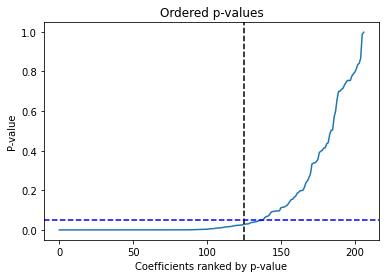

In [61]:
# Plot ordered pvalues
ax = sorted.plot.line(title = "Ordered p-values")
ax.set(xlabel="Coefficients ranked by p-value", ylabel="P-value")
ax.axvline(X_new.shape[1], color='k', linestyle='--')
ax.axhline(0.05, color='b', linestyle='--', label = 'p-value = 0.1')
ax

In [62]:

# ! it is more correct to perform FDR only on the train data, therefore it is inside the pipeline
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
pipe = Pipeline([('scaler', StandardScaler()),
                 ('fdr', SelectFdr(f_regression, alpha=0.1)),
                 ('regr', LinearRegression(fit_intercept = True, normalize=False, copy_X=False, n_jobs=-1))])
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set


In [63]:
pipe.fit(X_train, y_train)
print('In-sample Rsq: % .4f'
     % pipe.score(X_train, y_train)) #In sample fit decreases afte throughing out variables
print('Out-of-sample Rsq: % .4f'
     % pipe.score(X_test, y_test)) # Out of sample fit decresaed

E:\Anaconda3\envs\base-krea\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


In-sample Rsq:  0.1451
Out-of-sample Rsq:  0.0756


In [64]:
# Use K-fold out-of-sample validation to compare the predictive power of the full and of the reduced model
from sklearn.model_selection import KFold, cross_val_score

y = nona["on_job"]
X = nona.iloc[:, 1:]

kf = KFold(n_splits=5, shuffle=True, random_state=1) # we use five splits, randam_state makes sure we can replacte the data (get same random numbers)

pipe = Pipeline([('scaler', StandardScaler()),
                 ('regr', LinearRegression(fit_intercept = True, normalize=False, copy_X=False, n_jobs=-1))])
scores_full = cross_val_score(pipe, X, y, cv=kf)
print("scores full")
print(scores_full)
print("Accuracy: %0.5f (+/- %0.5f)" % (scores_full.mean(), scores_full.std() * 2))

scores full
[0.06292901 0.08870729 0.08774405 0.10919816 0.07921077]
Accuracy: 0.08556 (+/- 0.03001)


In [73]:
y = nona["on_job"]
X = nona.iloc[:, 1:]

kf = KFold(n_splits=5, shuffle=True, random_state=1)

pipe = Pipeline([('scaler', StandardScaler()),
                 ('fdr', SelectFdr(f_regression, alpha=0.05)),
                 ('regr', LinearRegression(fit_intercept = True, normalize=False, copy_X=False, n_jobs=-1))])
scores_reduced = cross_val_score(pipe, X, y, cv=kf)
print("scores_reduced")
print(scores_reduced)
print("Accuracy: %0.5f (+/- %0.5f)" % (scores_reduced.mean(), scores_reduced.std() * 2))

E:\Anaconda3\envs\base-krea\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
E:\Anaconda3\envs\base-krea\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
E:\Anaconda3\envs\base-krea\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
E:\Anaconda3\envs\base-krea\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


scores_reduced
[0.064215   0.09019099 0.08687772 0.11057928 0.0859218 ]
Accuracy: 0.08756 (+/- 0.02946)


E:\Anaconda3\envs\base-krea\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


In [68]:
# optimal lasso penalty
from sklearn.linear_model import LassoCV
pipe = Pipeline([('scaler', StandardScaler()),
                 ('lassocv', LassoCV(cv=5, max_iter=10000, alphas=np.logspace(-2.5, -0.5, 100), fit_intercept=True))])

print("Computing Lasso CV...")
t1 = time.time()
pipe.fit(X, y)
t_cv = time.time() - t1
print("Ready")
l = pipe.named_steps.lassocv #the output of lassocv step is stored here
print("Optimal alpha = % .4f " % l.alpha_)
print("Training time = % .4fs " % t_cv)

Computing Lasso CV...
Ready
Optimal alpha =  0.0269 
Training time =  9.2040s 


In [69]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('lasso', 
                  Lasso(alpha=l.alpha_, fit_intercept=True, normalize=False, copy_X=False, max_iter=10000))])
scores_lasso = cross_val_score(pipe, X, y, cv=kf)
print(scores_lasso)
print("Accuracy: %0.5f (+/- %0.5f)" % (scores_lasso.mean(), scores_lasso.std() * 2))

[0.0789388  0.1029754  0.09622062]
Accuracy: 0.09271 (+/- 0.02024)


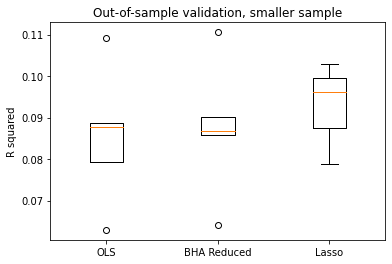

In [74]:
fig, ax = plt.subplots()
ax.boxplot([scores_full, scores_reduced, scores_lasso])
plt.xticks([1, 2, 3], ['OLS', 'BHA Reduced', 'Lasso'])
plt.ylabel('R squared')
plt.title('Out-of-sample validation, smaller sample')
plt.savefig('plots\outofsample_validation.png', bbox_inches='tight')


NOTE: out-of-sample performance of regularized models appears to be better--> less noise in the data and thus no overfitting.

Text(0.5, 1.0, 'Out-of-sample validation')

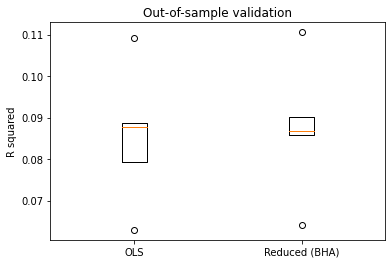

In [75]:
fig, ax = plt.subplots()
ax.boxplot([scores_full, scores_reduced])
plt.xticks([1, 2], ['OLS', 'Reduced (BHA)'])
plt.ylabel('R squared')
plt.title('Out-of-sample validation')

#### 2. Open Education

In [91]:
nona = y_X.drop(columns = ["on_job"])
nona = nona.dropna()

y = nona["open_educ"]
X = nona.iloc[:, 1:]

# Now let's apply Benjamini - Hochberg as a first attempt to regularise the model 
X = pd.DataFrame(np.ascontiguousarray(X.values), columns=X.columns)
X = StandardScaler().fit_transform(X)

In [92]:
fdr = SelectFdr(f_regression, alpha=0.05) 
# here alpha is our acceptable rate of finding false positives 
X_new =fdr.fit_transform(X, y) 

E:\Anaconda3\envs\base-krea\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


In [93]:
print(X.shape, X_new.shape)

(4092, 221) (4092, 25)


In [94]:
# Cutoff pvalue for selected features 
sorted = pd.Series(fdr.pvalues_.T).sort_values(axis=0, ascending=True).reset_index(drop = True)
print("Cutoff p-value: % .4f" % sorted.loc[X_new.shape[1]])

Cutoff p-value:  0.0068


In [95]:
print(X_new.shape[1])

25


In [96]:
print(sorted)

0      1.593248e-23
1      3.388215e-23
2      9.631746e-14
3      3.881892e-08
4      3.282158e-07
           ...     
216             NaN
217             NaN
218             NaN
219             NaN
220             NaN
Length: 221, dtype: float64


<AxesSubplot:title={'center':'Ordered p-values'}, xlabel='Coefficients ranked by p-value', ylabel='P-value'>

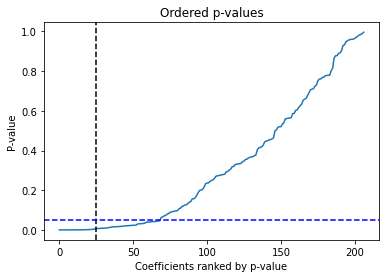

In [97]:
# Plot ordered pvalues
ax = sorted.plot.line(title = "Ordered p-values")
ax.set(xlabel="Coefficients ranked by p-value", ylabel="P-value")
ax.axvline(X_new.shape[1], color='k', linestyle='--')
ax.axhline(0.05, color='b', linestyle='--', label = 'p-value = 0.1')
ax

In [98]:
# ! it is more correct to perform FDR only on the train data, therefore it is inside the pipeline
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
pipe = Pipeline([('scaler', StandardScaler()),
                 ('fdr', SelectFdr(f_regression, alpha=0.1)),
                 ('regr', LinearRegression(fit_intercept = True, normalize=False, copy_X=False, n_jobs=-1))])
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set


In [99]:
pipe.fit(X_train, y_train)
print('In-sample Rsq: % .4f'
     % pipe.score(X_train, y_train)) #In sample fit decreases afte throughing out variables
print('Out-of-sample Rsq: % .4f'
     % pipe.score(X_test, y_test)) # Out of sample fit decresaed

In-sample Rsq:  0.0701
Out-of-sample Rsq:  0.0108


E:\Anaconda3\envs\base-krea\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
E:\Anaconda3\envs\base-krea\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
E:\Anaconda3\envs\base-krea\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:306: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom


In [101]:
# Use K-fold out-of-sample validation to compare the predictive power of the full and of the reduced model
from sklearn.model_selection import KFold, cross_val_score

y = nona["open_educ"]
X = nona.iloc[:, 1:]

kf = KFold(n_splits=5, shuffle=True, random_state=1) # we use five splits, randam_state makes sure we can replacte the data (get same random numbers)

pipe = Pipeline([('scaler', StandardScaler()),
                 ('regr', LinearRegression(fit_intercept = True, normalize=False, copy_X=False, n_jobs=-1))])
scores_full = cross_val_score(pipe, X, y, cv=kf)
print("scores full")
print(scores_full)
print("Accuracy: %0.5f (+/- %0.5f)" % (scores_full.mean(), scores_full.std() * 2))

scores full
[-2.33483324e-02 -1.19665592e-01  4.55411391e-05  3.27267162e-02
 -3.79725541e+20]
Accuracy: -75945108276502200320.00000 (+/- 303780433106008801280.00000)


In [103]:
y = nona["open_educ"]
X = nona.iloc[:, 1:]

kf = KFold(n_splits=5, shuffle=True, random_state=1)

pipe = Pipeline([('scaler', StandardScaler()),
                 ('fdr', SelectFdr(f_regression, alpha=0.05)),
                 ('regr', LinearRegression(fit_intercept = True, normalize=False, copy_X=False, n_jobs=-1))])
scores_reduced = cross_val_score(pipe, X, y, cv=kf)
print("scores_reduced")
print(scores_reduced)
print("Accuracy: %0.5f (+/- %0.5f)" % (scores_reduced.mean(), scores_reduced.std() * 2))

scores_reduced
[0.03485434 0.0178457  0.02529957 0.03406707 0.01569942]
Accuracy: 0.02555 (+/- 0.01589)


E:\Anaconda3\envs\base-krea\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
E:\Anaconda3\envs\base-krea\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
E:\Anaconda3\envs\base-krea\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
E:\Anaconda3\envs\base-krea\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
E:\Anaconda3\envs\base-krea\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


In [104]:
# optimal lasso penalty
from sklearn.linear_model import LassoCV
pipe = Pipeline([('scaler', StandardScaler()),
                 ('lassocv', LassoCV(cv=5, max_iter=10000, alphas=np.logspace(-2.5, -0.5, 100), fit_intercept=True))])

print("Computing Lasso CV...")
t1 = time.time()
pipe.fit(X, y)
t_cv = time.time() - t1
print("Ready")
l = pipe.named_steps.lassocv #the output of lassocv step is stored here
print("Optimal alpha = % .4f " % l.alpha_)
print("Training time = % .4fs " % t_cv)

Computing Lasso CV...
Ready
Optimal alpha =  0.1649 
Training time =  0.7437s 


In [105]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('lasso', 
                  Lasso(alpha=l.alpha_, fit_intercept=True, normalize=False, copy_X=False, max_iter=10000))])
scores_lasso = cross_val_score(pipe, X, y, cv=kf)
print(scores_lasso)
print("Accuracy: %0.5f (+/- %0.5f)" % (scores_lasso.mean(), scores_lasso.std() * 2))

[0.03634386 0.04434553 0.02500458 0.02173081 0.02605707]
Accuracy: 0.03070 (+/- 0.01679)


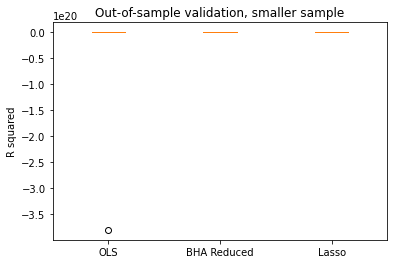

In [106]:
fig, ax = plt.subplots()
ax.boxplot([scores_full, scores_reduced, scores_lasso])
plt.xticks([1, 2, 3], ['OLS', 'BHA Reduced', 'Lasso'])
plt.ylabel('R squared')
plt.title('Out-of-sample validation, smaller sample')
plt.savefig('plots\outofsample_validation_openEduc.png', bbox_inches='tight')


## Lasso

In [76]:
# Use K-fold out-of-sample validation to select the 'best' $\lambda$. Plot average out-of-sample error as a function of $\lambda$. 
# Note: can take some time
from sklearn.linear_model import LassoCV
import time

y = nona["on_job"]
X = nona.iloc[:, 1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1) 


pipe = Pipeline([('scaler', StandardScaler()),
                 ('lasso', 
                  Lasso(alpha=0.05, fit_intercept=True, normalize=False, copy_X=False, max_iter=10000))])
# note alpha == lambda in the lecture notes; we just take some value - it is not the optimal! 
# again if you simply follow the defaults, it is not necessary to specify the options
pipe.fit(X_train, y_train)
print('In-sample Rsq: % .4f'
     % pipe.score(X_train, y_train))
print('Out-of-sample Rsq: % .4f'
     % pipe.score(X_test, y_test))

In-sample Rsq:  0.1230
Out-of-sample Rsq:  0.0681


old result: 
In-sample Rsq:  0.1315
Out-of-sample Rsq:  0.0692

Computing regularization path using the lasso...
Ready


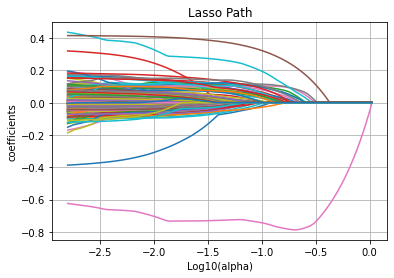

<Figure size 432x288 with 0 Axes>

In [79]:
# lasso path
from sklearn.linear_model import lasso_path, enet_path

X = StandardScaler().fit_transform(X_train) 
# Compute paths
eps = 0.0015 #the smaller it is the longer is the path; 0 = OLS. If it is very small: the model might not find a solution
print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X, y_train, eps=eps, max_iter=10000, fit_intercept=True)
print("Ready")

plt.figure()
log_alphas_lasso = np.log10(alphas_lasso)
for coef_l in coefs_lasso:
    l1 = plt.plot(log_alphas_lasso, coef_l)

plt.xlabel('Log10(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso Path')
plt.axis('tight')
plt.grid(axis='both')
plt.show()

plt.savefig('plots\lasso_path_onJob.png', bbox_inches='tight')

Lasso Path shows the path of estimated coefficients for different values of $\lambda$. When $\lambda$ approaches zero, we are close to the OLS with all the variables. The path also shows us the $\lambda$ when all the coefficients are zero (null model). For this graph such $\lambda$ is around 1. It is helpful for the next step, when we define the search grid to find the optimal $\lambda$. 
#### Selecting optimal $\lambda$ with cross-validation and information criteria

In [80]:
from sklearn.linear_model import LassoCV
import time

pipe = Pipeline([('scaler', StandardScaler()),
                 ('lassocv', LassoCV(cv=5, max_iter=10000, alphas=np.logspace(-3, -2.5, 100), fit_intercept=True))])

print("Computing Lasso CV...")
t1 = time.time()
pipe.fit(X_train, y_train)
t_cv = time.time() - t1
print("Ready")

l = pipe.named_steps.lassocv #the output of lassocv step is stored here
print("Optimal alpha = % .4f " % l.alpha_)
print("Training time = % .4fs " % t_cv)

Computing Lasso CV...
Ready
Optimal alpha =  0.0032 
Training time =  8.4874s 


(-3.025, -2.475, 10.464970742000357, 17.19000994825827)

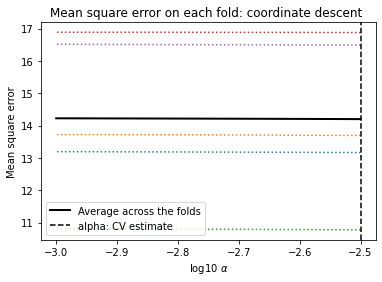

In [84]:
# Display results
log_alphas_lasso = np.log10(l.alphas_)

plt.figure()
plt.plot(log_alphas_lasso , l.mse_path_, ':')
plt.plot(log_alphas_lasso , l.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(np.log10(l.alpha_) , linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()

plt.xlabel(r'log10 $\alpha$')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent ')
plt.axis('tight')

In [85]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('lasso', 
                  Lasso(alpha=l.alpha_, fit_intercept=True, normalize=False, copy_X=False, max_iter=10000))])
# note alpha == lambda in the lecture notes; we just take some value - it is not the optimal! 
# again if you simply follow the defaults, it is not necessary to specify the options
pipe.fit(X_train, y_train)
print('In-sample Rsq: % .4f'
     % pipe.score(X_train, y_train))
print('Out-of-sample Rsq: % .4f'
     % pipe.score(X_test, y_test))

In-sample Rsq:  0.1393
Out-of-sample Rsq:  0.0648


In [82]:
# we can also check which coefficients were selected by LASSO 
pipe.named_steps['lasso'].coef_ # note the syntaxis pipe.named_steps

array([-3.71744173e-01,  5.71693838e-03,  7.74628485e-02,  3.06389262e-01,
        1.14769056e-01, -4.75089060e-02,  1.05350018e-01,  4.55143959e-02,
        1.15775131e-01, -4.74208399e-02, -3.28761544e-02, -3.12672577e-02,
       -4.68977144e-03, -5.48366882e-02,  0.00000000e+00,  0.00000000e+00,
        1.40462791e-03, -1.64179778e-02, -1.23767416e-02, -7.02721517e-03,
       -2.53757193e-02,  0.00000000e+00, -2.15821542e-02, -4.51063275e-02,
        1.65988464e-02,  1.12434385e-02,  1.63886467e-01,  5.09872044e-02,
        1.20219232e-01, -0.00000000e+00,  1.62705109e-01,  4.05294564e-02,
        4.01974877e-03,  8.97847515e-03, -7.33226507e-02, -3.32131536e-02,
        6.03286260e-02,  1.71506033e-01, -2.70534523e-02,  3.99715889e-01,
       -2.25881996e-02, -0.00000000e+00,  4.53045680e-03,  1.81629134e-02,
       -9.30025994e-02,  0.00000000e+00,  1.33138168e-02, -6.37420116e-02,
       -1.09337397e-01,  2.71665940e-02, -8.30307522e-02, -4.48626840e-02,
        9.00280461e-02, -

In [86]:
imp = pd.DataFrame(pipe.named_steps['lasso'].coef_, columns = ['Lasso coefficient'])
imp['Feature'] = list(X_train.columns)
imp

,Lasso coefficient,Feature
0,-0.371744,age_r
1,0.005717,j_q03b
2,0.077463,yrsget
3,0.306389,c_q09
4,0.114769,c_q10a
...,...,...
216,0.000792,isic1c_T
217,-0.027841,isic1c_U
218,-0.102881,skill_1
219,-0.115542,skill_2


In [87]:
index = imp[(imp['Lasso coefficient'] == 0)].index
imp.drop(index, inplace=True)
imp

,Lasso coefficient,Feature
0,-0.371744,age_r
1,0.005717,j_q03b
2,0.077463,yrsget
3,0.306389,c_q09
4,0.114769,c_q10a
...,...,...
215,-0.043049,isic1c_S
216,0.000792,isic1c_T
217,-0.027841,isic1c_U
218,-0.102881,skill_1


#### Lasso for open education

In [89]:
nona = y_X.drop(columns = ["on_job"])
nona = nona.dropna()
y = nona["open_educ"]
X = nona.iloc[:, 2:]

In [88]:
# Use K-fold out-of-sample validation to select the 'best' $\lambda$. Plot average out-of-sample error as a function of $\lambda$. 
# Note: can take some time
from sklearn.linear_model import LassoCV
import time

y = nona["open_educ"]
X = nona.iloc[:, 1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1) 


pipe = Pipeline([('scaler', StandardScaler()),
                 ('lasso', 
                  Lasso(alpha=0.05, fit_intercept=True, normalize=False, copy_X=False, max_iter=10000))])
# note alpha == lambda in the lecture notes; we just take some value - it is not the optimal! 
# again if you simply follow the defaults, it is not necessary to specify the options
pipe.fit(X_train, y_train)
print('In-sample Rsq: % .4f'
     % pipe.score(X_train, y_train))
print('Out-of-sample Rsq: % .4f'
     % pipe.score(X_test, y_test))

KeyError: 'open_educ'

# Random Forest 

In [68]:

rf = ensemble.RandomForestRegressor(n_estimators = 50, min_samples_leaf = 1, oob_score = True, \
        random_state = 1, max_features = int(X_train.shape[1]/3))
rf = rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
# Out-of-sample R-sq.
print('Out-of-sample Rsq: %.3f'
      % r2_score(y_test, y_pred))
print('Out-of-sample MSE: %.3f'
      % mean_squared_error(y_test, y_pred))

Out-of-sample Rsq: 0.071
Out-of-sample MSE: 21.578


In [71]:
# we can check whether we had enough trees in the forest
# Use cross-validation to determine the optimal number of trees
from sklearn.model_selection import cross_validate
import scipy as sp

def cv_iter(n, folds, X, y):
    kf = KFold(n_splits=folds, shuffle=True, random_state=1)
    rf = ensemble.RandomForestRegressor(n_estimators = n, min_samples_leaf = 1, \
        random_state = 1)
    cv_result = cross_validate(rf, X, y, scoring = 'neg_mean_squared_error')
    avg_score = np.mean(cv_result['test_score'])
    return float(-avg_score)

<AxesSubplot:xlabel='Number of trees'>

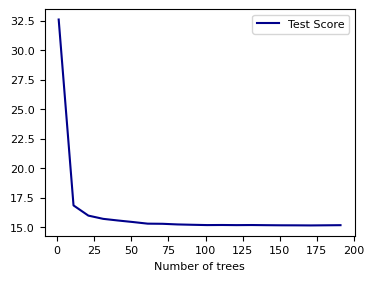

In [74]:


result = {}
for i in range(1, 200, 10):
    result[i] = cv_iter(i, 5, X_train, y_train)

plt.rcParams.update({'font.size': 8, 'figure.figsize': (4, 3), 'figure.dpi': 100})    
results = pd.DataFrame.from_dict(result,orient='index', columns = ['Test Score'])
results.plot(color = 'DarkBlue', xlabel = 'Number of trees')

# as we can see on the graph below, the MSE stabilizes with about 50 trees. 

In [83]:
# feature importance

imp = pd.DataFrame(rf.feature_importances_, columns = ['Feature importance'])
imp['Feature'] = list(X_train.columns)
imp.sort_values(by=['Feature importance'], ascending=False).reset_index(drop = True)


,Feature importance,Feature
0,0.044199,earnmthallppp
1,0.042152,icthome
2,0.040991,readytolearn
3,0.032156,ictwork
4,0.030709,d_q16b
...,...,...
429,0.000000,cnt_brth_Malta
430,0.000000,cnt_brth_Mali
431,0.000000,"c_d06_Yes, unpaid work for family business"
432,0.000000,cnt_brth_Malawi
